# k-최근접 이웃 (kNN : k-nNearest Neighbors)

- #Supervised
- #지도학습

|         장점         |       단점      |
|:--------------------:|:---------------:|
| 정확도 | 메모리와 계산량 |
| 선입견과 가정이 없음 | 기존 훈련용 데이터에 의존 |
| 이상치에 영향이 적음 | |
| 훈련과정이 불필요함| |


## 거리 측정을 기준으로 분류

k-최근접이웃 분류방법은 기존에 훈련용 데이터 집합과 항목(labels)을 새로운 데이터와 비교하여 가장 근접한 항목으로 분류하는 방법이다. 가장 근접한 항목을 k개수만큼 선정한 뒤 다수결을 통해 분류항목을 결정한다.

## 일반적 알고리즘
1. 

In [3]:
# Import Packages
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series

## 기본예제 1

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
x1,12.595063,15.542943,8.258262,20.981374,6.053343,23.706379,21.424257,9.931085,12.110654,15.104998,...,12.864251,15.368529,15.205629,10.947875,14.088058,19.490715,8.080096,10.451796,21.325461,9.759405
x2,8.243820,0.689499,14.120903,15.867654,17.489436,23.327626,20.504934,12.160047,21.429381,19.158264,...,-4.160881,19.774432,21.544779,6.292905,17.141737,13.944367,7.417540,12.680346,4.903620,20.653293
t,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000


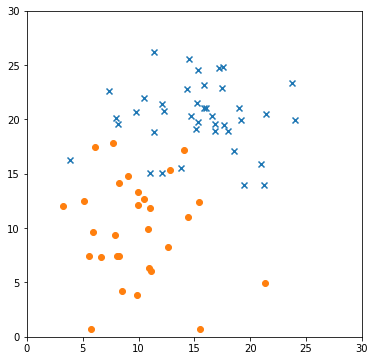

In [4]:
# Example Data Creation
np.random.seed(20121283)

n0, mu0, variance0 = 30, [10, 11], 20
data0 = multivariate_normal(mu0, np.eye(2)*variance0 ,n0)
df0 = DataFrame(data0, columns=['x1','x2'])
df0['t'] = 0

n1, mu1, variance1 = 40, [16, 19], 17
data1 = multivariate_normal(mu1, np.eye(2)*variance1 ,n1)
df1 = DataFrame(data1, columns=['x1','x2'])
df1['t'] = 1

df = pd.concat([df0, df1], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

# Extract data separately for t=0 and t=1
train_set0 = train_set[train_set['t']==0]
train_set1 = train_set[train_set['t']==1]


train_x = train_set[['x1','x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set), 1])

# Plot each data - use x or o depend on the value of t
fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([0,30])
subplot.set_xlim([0,30])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set0.x1, train_set0.x2, marker='o')

train_set.T